In [0]:
import tensorflow as tf 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [4]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [0]:
import io
data = pd.read_csv(io.BytesIO(uploaded['train.csv']))

In [20]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [0]:
data.drop(columns=['keyword', 'location', 'id'], inplace=True)

In [22]:
data.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [0]:
from sklearn.model_selection import train_test_split

X = data['text']
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [0]:
vocab_size = 1000
embedding_dim = 16
max_length = 100
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'

In [0]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(X_train)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [112]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Dense(12, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(6, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_18 (Embedding)     (None, 100, 16)           16000     
_________________________________________________________________
global_average_pooling1d_18  (None, 16)                0         
_________________________________________________________________
dense_48 (Dense)             (None, 12)                204       
_________________________________________________________________
dropout_21 (Dropout)         (None, 12)                0         
_________________________________________________________________
dense_49 (Dense)             (None, 6)                 78        
_________________________________________________________________
dropout_22 (Dropout)         (None, 6)                 0         
_________________________________________________________________
dense_50 (Dense)             (None, 1)               

In [0]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [0]:
cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                      patience=20)

In [115]:
modelo = model.fit(training_padded, y_train, epochs=350, batch_size=128, validation_data=(testing_padded, y_test), callbacks=cb)

Epoch 1/350
42/42 [==============================] - 0s 8ms/step - loss: 0.6936 - accuracy: 0.4697 - val_loss: 0.6928 - val_accuracy: 0.5788
Epoch 2/350
42/42 [==============================] - 0s 6ms/step - loss: 0.6927 - accuracy: 0.5571 - val_loss: 0.6923 - val_accuracy: 0.5788
Epoch 3/350
42/42 [==============================] - 0s 7ms/step - loss: 0.6922 - accuracy: 0.5660 - val_loss: 0.6918 - val_accuracy: 0.5788
Epoch 4/350
42/42 [==============================] - 0s 6ms/step - loss: 0.6919 - accuracy: 0.5663 - val_loss: 0.6914 - val_accuracy: 0.5788
Epoch 5/350
42/42 [==============================] - 0s 6ms/step - loss: 0.6917 - accuracy: 0.5667 - val_loss: 0.6911 - val_accuracy: 0.5788
Epoch 6/350
42/42 [==============================] - 0s 6ms/step - loss: 0.6914 - accuracy: 0.5667 - val_loss: 0.6907 - val_accuracy: 0.5788
Epoch 7/350
42/42 [==============================] - 0s 6ms/step - loss: 0.6910 - accuracy: 0.5667 - val_loss: 0.6904 - val_accuracy: 0.5788
Epoch 8/350
4

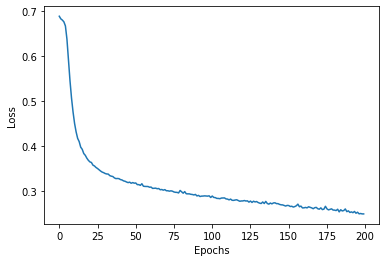

In [29]:

plt.plot(modelo.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

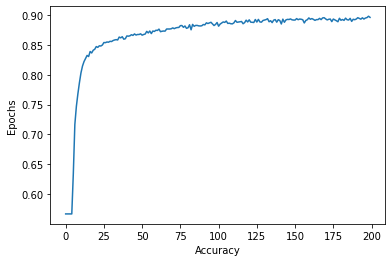

In [30]:
plt.plot(modelo.history['accuracy'])
plt.xlabel('Accuracy')
plt.ylabel('Epochs')
plt.show()